In [1]:
import gensim
from gensim.utils import tokenize # tokenize(text, lowercase=False)
from gensim.models import Word2Vec

with open("article.txt", "r") as f:
    text = f.read()

print(text)
sentences = [ list(tokenize(sentence)) for sentence in text.split(".") if sentence ] # list(tokenize(sentence))+["."]
print( sentences )
L = list({ word for sentence in sentences for word in sentence })
print(len(L))

The crash is one of Australia's deadliest road incidents.

Brett Andrew Button, 58, has been charged with multiple counts of dangerous driving and negligence, after being arrested on Monday.

He was allegedly driving "in a manner that was inconsistent with the conditions", the NSW Police Traffic and Highway Patrol Commander told reporters on Tuesday.

"He lost control of that vehicle... obviously the speed was too quick for him to negotiate that roundabout," Acting Assistant Commissioner David Waddell added.

Fourteen people injured in the crash in the Hunter Valley wine region remain in hospital, with two in a critical condition, police say.

They have not formally identified any of the victims, but the mayor of Singleton said many lived in the small town.

"I know we'll never get over it," Sue Moore told the BBC.

Some local families have been at the side of injured people in hospital in Newcastle and Sydney, Ms Moore said, and others are planning funerals while reeling from "the wor

In [2]:
# Train the Word2Vec model
# size: embedding dimension # window: window size # min_count=1: minimum of being included frequency
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1)

In [3]:
model.wv["for"]

array([ 8.3329855e-03, -5.5770006e-04, -9.4460240e-03,  4.7671972e-03,
       -6.0227690e-03,  6.6338913e-03,  5.3938534e-03, -4.9853385e-03,
        2.5367532e-03,  5.3960825e-03, -3.6269333e-03, -1.5869987e-03,
        9.1503663e-03,  9.0781199e-03, -9.4006099e-03,  7.5517772e-03,
        9.9130860e-03, -2.8348232e-03,  2.4700407e-03, -2.8609016e-03,
        8.6363051e-03, -2.9046030e-04,  5.6452011e-03,  9.1647832e-03,
        4.0879478e-03, -7.1071913e-03, -1.9294267e-03,  9.1166649e-04,
        2.0062879e-03,  3.0199254e-03,  9.5098270e-03,  4.4022365e-03,
        9.9010617e-03, -8.7102382e-03, -5.8062002e-03,  1.9990595e-03,
        3.6601308e-03, -1.0044817e-03, -6.8894485e-03, -3.3041656e-03,
       -8.5005946e-03,  9.3892533e-03,  3.7221399e-03, -7.8720655e-03,
        3.1816296e-03,  4.1720406e-03, -5.6398069e-03, -5.9393505e-03,
        1.0614225e-03,  8.9630987e-03, -9.6453344e-03, -5.8968824e-05,
       -6.8213684e-03, -9.5342856e-04,  3.0176288e-03, -5.0237486e-03,
      

In [4]:
model.wv.similar_by_key("on") # top_n=10

[('is', 0.23270681500434875),
 ('lot', 0.2220737338066101),
 ('the', 0.2207738757133484),
 ('Patrol', 0.19867423176765442),
 ('say', 0.1876543015241623),
 ('Brett', 0.18156176805496216),
 ('incidents', 0.181327685713768),
 ('a', 0.17678971588611603),
 ('parents', 0.1668464094400406),
 ('worst', 0.1657363921403885)]

In [6]:
L_vec = []
for word in L:
    L_vec.append( model.wv[word] )

In [7]:
import numpy as np
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform( np.array(L_vec) )
X_embedded.shape

(157, 2)

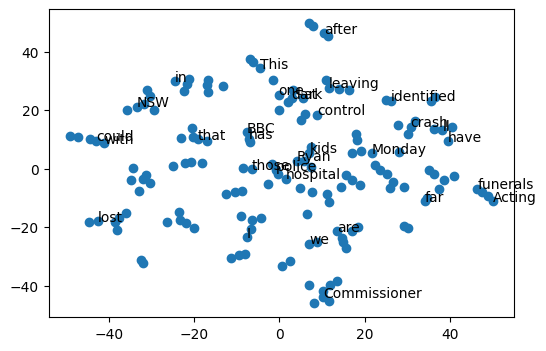

In [23]:
import matplotlib.pyplot as plt

X, y = X_embedded[:,0], X_embedded[:,1]

fig = plt.figure(figsize=(6,4))
sp  = plt.subplot(1,1,1) 
for i in range(0,len(L),5):
    sp.text( X[i], y[i], L[i])
plt.scatter(X,y)
plt.show()

In [24]:
model.save("toy_word2vec")

In [25]:
model2 = Word2Vec.load("toy_word2vec")
model2.wv.vectors.shape

(157, 100)